# Loan Data from Prosper
## by Choke Estifanos

## Preliminary Wrangling

The data was collected by the Prosper Loans, which is a marketplace lending company that provides the unsecured personal loan for its customers.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


#### Load in your dataset and describe its properties 

In [2]:
# load a dataset and display the first 5 rows
loan = pd.read_csv("prosperLoanData.csv")
loan.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

## Dataset Overview

In [3]:
# Overview of the shape and data types of a dataset
print(loan.shape)
loan.dtypes

(113937, 81)


ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

### What is the structure of your dataset?

   * The dataset contains 113,937 rows and 81 columns

### What is/are the main feature(s) of interest in your dataset?

   * LoanOriginalAmount

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
* ProsperRating (numeric), Occupation, EmploymentStatus,IsBorrowerHomeowner, CreditScoreRangeUpper, OpenRevolvingMonthlyPayment, RevolvingCreditBalance, StatedMonthlyIncome  


## Univariate Exploration

#### What is the distribution of individual variables in this dataset?  Before investigating the distribution of variables, I am going to explore the dateset and clean up if there are any null values in each row

In [4]:
 # Features of interest to investigate from loan dataset
loan_features = loan[['Occupation', 'EmploymentStatus','IsBorrowerHomeowner', 'CreditScoreRangeUpper', 'OpenRevolvingMonthlyPayment', 'RevolvingCreditBalance', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'BorrowerRate' ]]
print(loan_features.shape)
print(loan_features.dtypes)
loan_features.head()

(113937, 9)
Occupation                      object
EmploymentStatus                object
IsBorrowerHomeowner               bool
CreditScoreRangeUpper          float64
OpenRevolvingMonthlyPayment    float64
RevolvingCreditBalance         float64
StatedMonthlyIncome            float64
LoanOriginalAmount               int64
BorrowerRate                   float64
dtype: object


Occupation EmploymentStatus  IsBorrowerHomeowner  CreditScoreRangeUpper  \
0          Other    Self-employed                 True                  659.0   
1   Professional         Employed                False                  699.0   
2          Other    Not available                False                  499.0   
3  Skilled Labor         Employed                 True                  819.0   
4      Executive         Employed                 True                  699.0   

   OpenRevolvingMonthlyPayment  RevolvingCreditBalance  StatedMonthlyIncome  \
0                         24.0                     0.0          3083.333333   
1                        389.0                  3989.0          6125.000000   
2                          0.0                     NaN          2083.333333   
3                        115.0                  1444.0          2875.000000   
4                        220.0                  6193.0          9583.333333   

   LoanOriginalAmount  BorrowerRate  
0                9425        0.1580  
1               10000        0.0920  
2                3001        0.2750  
3               10000        0.0974  
4               15000        0.2085

In [5]:
# Total null values in each column of interest
loan_features.isnull().sum()

Occupation                     3588
EmploymentStatus               2255
IsBorrowerHomeowner               0
CreditScoreRangeUpper           591
OpenRevolvingMonthlyPayment       0
RevolvingCreditBalance         7604
StatedMonthlyIncome               0
LoanOriginalAmount                0
BorrowerRate                      0
dtype: int64

In [6]:
# Drop null values from each row and test the result
loan_features = loan_features.dropna()
loan_features.isnull().sum()


Occupation                     0
EmploymentStatus               0
IsBorrowerHomeowner            0
CreditScoreRangeUpper          0
OpenRevolvingMonthlyPayment    0
RevolvingCreditBalance         0
StatedMonthlyIncome            0
LoanOriginalAmount             0
BorrowerRate                   0
dtype: int64

# Number of rows and columns after cleaning
loan_features.shape

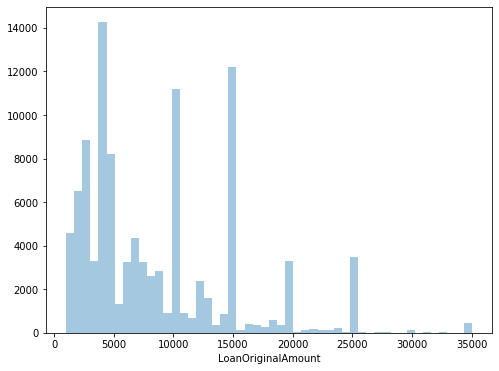

In [7]:
# Display the distribution of the numeric variables
plt.figure(figsize=(8, 6))
sb.distplot(loan_features["LoanOriginalAmount"], kde=False)


plt.show();

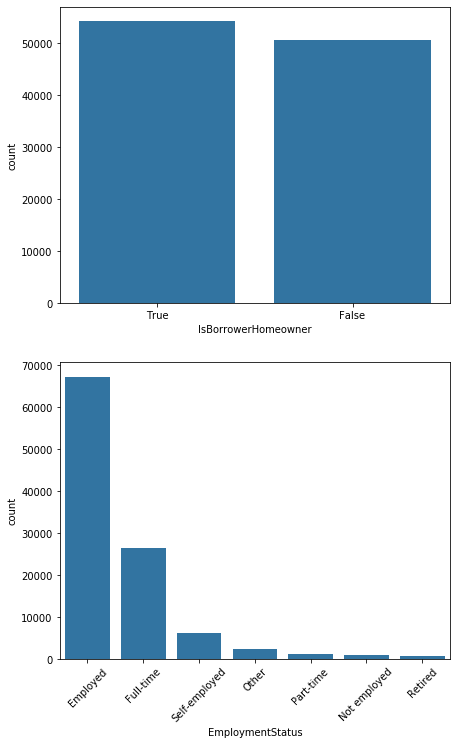

In [8]:
# Display the distribution of qualitative variables
fig, ax = plt.subplots(nrows=2, figsize= [7, 12])
color = sb.color_palette()[0]
order= loan_features["EmploymentStatus"].value_counts().index
order_= loan_features["IsBorrowerHomeowner"].value_counts().index
sb.countplot(data = loan_features, x = "IsBorrowerHomeowner", color= color, ax=ax[0], order= order_ )
sb.countplot(data= loan_features, x = "EmploymentStatus", color= color, ax= ax[1], order= order)
plt.xticks(rotation= 45)
plt.show();

## Bivariate Exploration

#### What is the relationship between two variables in this dataset?

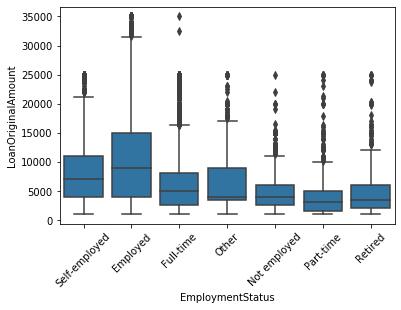

In [9]:
# Box plot for the relationship between the quantitative  and qualitative variables
color = sb.color_palette()[0]
sb.boxplot(data= loan_features, x= "EmploymentStatus", y= "LoanOriginalAmount", color= color)
plt.xticks(rotation= 45);

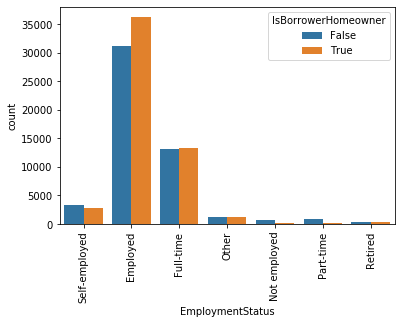

In [10]:
# Clustered bar charts for two categorical variables
sb.countplot(data=loan_features, x= "EmploymentStatus", hue= "IsBorrowerHomeowner")
plt.xticks(rotation = 90);

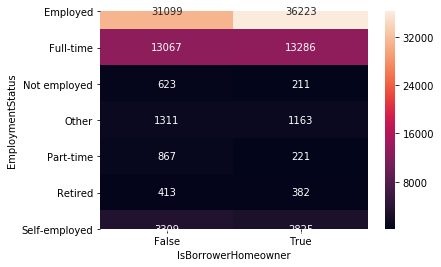

In [11]:
# Heatmap for two categorical variables
ct_counts = loan_features.groupby(["IsBorrowerHomeowner", "EmploymentStatus"]).size()
ct_counts = ct_counts.reset_index(name = "count")
ct_counts =ct_counts.pivot(index= 'EmploymentStatus', columns= 'IsBorrowerHomeowner', values = 'count')
sb.heatmap(ct_counts, annot=True, fmt = "d");

## Multivariate Exploration

* What are the relationships among three or more variabls in this dateset?

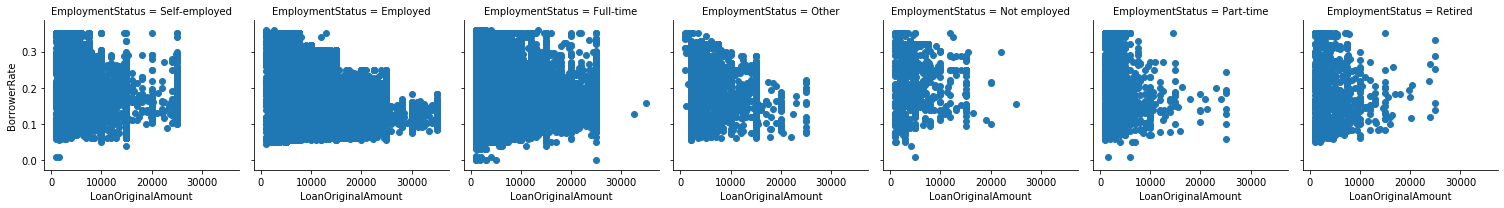

In [12]:
# Create Faceted heat maps on EmploymentStatus 
g= sb.FacetGrid(data= loan_features, col="EmploymentStatus")
g.map(plt.scatter, 'LoanOriginalAmount',  'BorrowerRate')
plt.show();

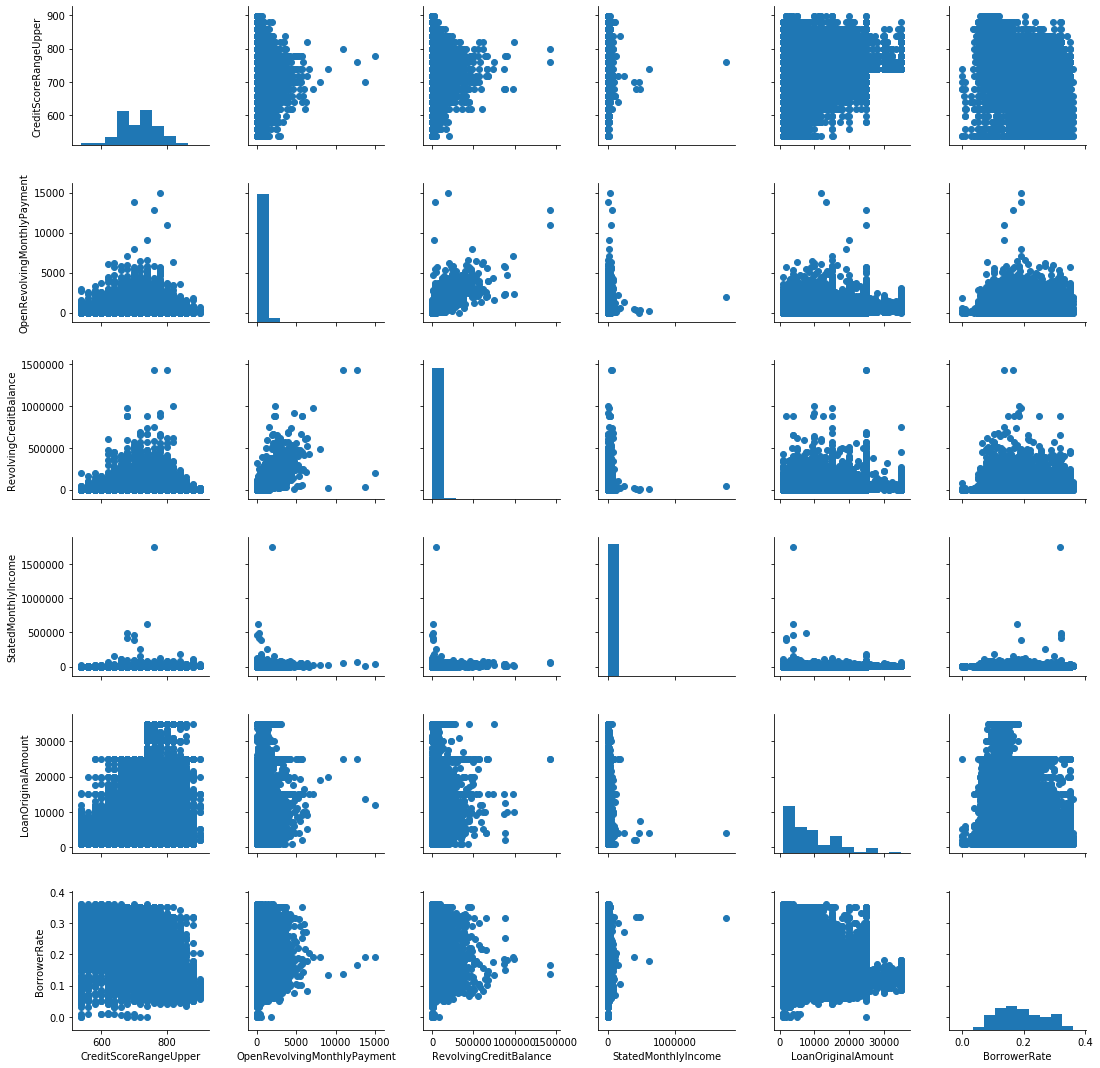

In [13]:
# create a pairgrid plots of variables
loan_stats = ['CreditScoreRangeUpper', 'OpenRevolvingMonthlyPayment', 'RevolvingCreditBalance', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'BorrowerRate' ]
graph = sb.PairGrid(data=loan_features, vars= loan_stats)
graph = graph.map_offdiag(plt.scatter)
graph.map_diag(plt.hist);

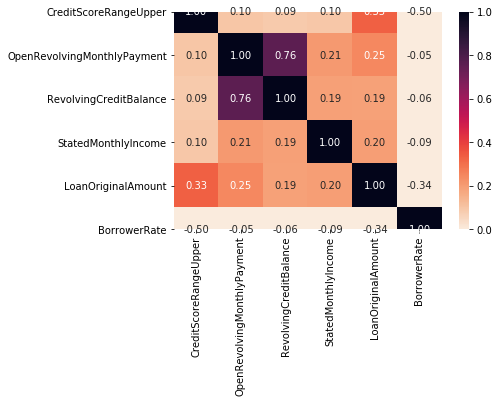

In [14]:
# Create Heat maps of six variables
sb.heatmap(loan_features[loan_stats].corr(), cmap="rocket_r", annot=True, fmt= ".2f", vmin= 0);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?




* There are high correlation between LoanOriginalAmount and CreditScoreRangeUpper, and OpenRevolvingMonthlyPayment and RevolvingCreditBalance, but there is a negative high correlation between BorrowerRate and CreditScoreRangeUpper
